# Patients with prescriptions, over time.

The purpose of this notebook is to plot the journey of patients that satisfy the prescription-based caseness, over time in four-month chunks. I will visualise the data with an alluvial plot.

The motivation is that we want to see if there are marked declines in the counts of patients with the prescriptions of interest. W

The rationale is that we hope that this will give us an indication of the duration back in time from an index date that sufficiently distinguishes active pharmaceutical treatment for CMHD from historic CMHD.

I will run a portion of the code used in 'UNSEEN_create_caseness_variables.IPYNB' to return the count of patients that have a prescription  within 1-60 months of the index date.

There are two components to a [Sankey diagram in Python](https://plotly.com/python/sankey-diagram/).
1. Node: these are the source and destination for the flows.
2. Link: these are flows.

The only vital argument for the nodes is the `label` list, which contains all the source and destination nodes that will be used in the entire Sankey diagram.

The vital arguments for the links are three lists:
1. source = the index in the `label` list that indicates which label is the left side of a flow.
2. target = the index in the `label` list that indicates which label is the right side of a flow.
3. value  = the count of the entities in the flow; this represents the width of the flow.

An example Sankey is shown below.

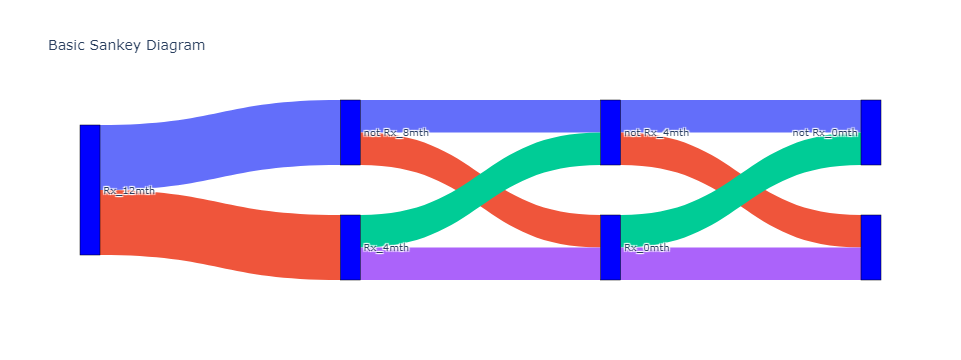

In [5]:
import plotly.graph_objects

fig = plotly.graph_objects.Figure(data = [plotly.graph_objects.Sankey(
    node = dict(
      pad = 50,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["Rx_12mth",
               "Rx_8mth", "not Rx_8mth",
               "Rx_4mth", "not Rx_4mth",
               "Rx_0mth", "not Rx_0mth"],
      color = "blue"
    ),
    link = dict(
      source = [
          0, # "Rx_12mth"      ->   "Rx_8mth"
          0, # "Rx_12mth"      ->   "not Rx_8mth"
          2, # "Rx_8mth"       ->   "Rx_4mth"
          2, # "Rx_8mth"       ->   "not Rx_4mth"
          3, # "not Rx_8mth"   ->   "Rx_4mth"
          3, # "not Rx_8mth"   ->   "not Rx_4mth"
          4, # "Rx_4mth"       ->   "Rx_0mth"
          4, # "Rx_4mth"       ->   "not Rx_0mth"
          5, # "not Rx_4mth"   ->   "Rx_0mth"
          5, # "not Rx_4mth"   ->   "not Rx_0mth"
      ],
      target = [
          2, # "Rx_12mth"      ->   "Rx_8mth"
          3, # "Rx_12mth"      ->   "not Rx_8mth"
          4, # "Rx_8mth"       ->   "Rx_4mth"
          5, # "Rx_8mth"       ->   "not Rx_4mth"
          4, # "not Rx_8mth"   ->   "Rx_4mth"
          5, # "not Rx_8mth"   ->   "not Rx_4mth"
          6, # "Rx_4mth"       ->   "Rx_0mth"
          7, # "Rx_4mth"       ->   "not Rx_0mth"
          6, # "not Rx_4mth"   ->   "Rx_0mth"
          7, # "not Rx_4mth"   ->   "not Rx_0mth"
      ],
      value = [
          20, # "Rx_12mth"      ->   "Rx_8mth"
          20, # "Rx_12mth"      ->   "not Rx_8mth"
          10, # "Rx_8mth"       ->   "Rx_4mth"
          10, # "Rx_8mth"       ->   "not Rx_4mth"
          10, # "not Rx_8mth"   ->   "Rx_4mth"
          10, # "not Rx_8mth"   ->   "not Rx_4mth"
          10, # "Rx_4mth"       ->   "Rx_0mth"
          10, # "Rx_4mth"       ->   "not Rx_0mth"
          10, # "not Rx_4mth"   ->   "Rx_0mth"
          10, # "not Rx_4mth"   ->   "not Rx_0mth"
      ],
      color = [
          '#636EFA', # "Rx_12mth"      ->   "Rx_8mth"
          '#EF553B', # "Rx_12mth"      ->   "not Rx_8mth"
          '#636EFA', # "Rx_8mth"       ->   "Rx_4mth"
          '#EF553B', # "Rx_8mth"       ->   "not Rx_4mth"
          '#00CC96', # "not Rx_8mth"   ->   "Rx_4mth"
          '#AB63FA', # "not Rx_8mth"   ->   "not Rx_4mth"
          '#636EFA', # "Rx_4mth"       ->   "Rx_0mth"
          '#EF553B', # "Rx_4mth"       ->   "not Rx_0mth"
          '#00CC96', # "not Rx_4mth"   ->   "Rx_0mth"
          '#AB63FA', # "not Rx_4mth"   ->   "not Rx_0mth"
          # Links are colour-coded based on their combination of 
          # source and destination/target:
          # Yes -> Yes = '#0aa116'
          # Yes -> No  = '#f71414'
          # No  -> Yes = '#10e822'
          # No  -> No  = '#b03a3a'
      ]
  ))])


fig.update_layout(title_text = "Basic Sankey Diagram", font_size = 10)
fig.show()

To make the Sankey diagram that we are looking for, I need to produce a list of lists in the following format:
1. myList\['node_label'\]   = Preset list of source and target labels:
    - \["Rx_12mth", "Rx_8mth", "not Rx_8mth", "Rx_4mth", "not Rx_4mth", "Rx_0mth", "not Rx_0mth"\]
2. myList\['link_source'\]  = Preset list of source nodes, shown in example above:
    - \[0, 0, 1, 1, 2, 2, 3, 3, 4, 4\]
3. myList\['link_target'\]  = Preset list of source nodes, shown in example above:
    - \[1, 2, 3, 4, 3, 4, 5, 6, 5, 6\]
4. myList\['link_value'\]   = Count of patients with a prescription that match the source and target labels.
    - This will be the result of the BigQuery query.
5. myList\['link_colour'\]  = Preset list of HEX colours:
    - \['#0aa116', '#f71414', '#0aa116', '#f71414', '#10e822', '#b03a3a', '#0aa116', '#f71414', '#10e822', '#b03a3a'\]

### Imports

In [6]:
%run 'UNSEEN_helper_functions.ipynb'
%store -r

### Prerequisites

In [7]:
%%capture
# Set index date. Usually CURRENT_DATE() but Dec 2021 will be used until cB fixed the missing prescriptions.
myIndexDate =  '2021-12-31'

# Set the capture window that indicates an active prescription of the medications of interest.
meds_catch_window = range(60)

# Set parameters for disclosivity adjustments.
redaction_threshold = 7
target_round = 10

# Set the database attributes.
global server_id
server_id = 'yhcr-prd-phm-bia-core'
global database_id
database_id = 'CB_FDM_PrimaryCare_V7'

# Set folder location.
folder_loc = os.path.dirname(os.path.abspath("UNSEEN create caseness array.ipynb"))
folder = folder_loc + '/codelists/'

# Medications of interest.
medications_to_query_all = pandas.read_csv(folder + "UNSEEN_medications_list.csv")

### Count patients with prescriptions at each interval threshold.

In [8]:
sql_base = \
"""
DECLARE myIndexDate DATE DEFAULT '""" + myIndexDate + """';

WITH
# ## Define a list of people within the age range.
tbl_people_within_age_range AS (
    SELECT
        DISTINCT person_id
    FROM
        """ + server_id + """.""" + database_id + """.person
    # Limiting to age range 18-70.
    WHERE
        (EXTRACT(YEAR FROM myIndexDate) - year_of_birth) BETWEEN 18 AND 70
)
"""

sql_middle = \
"""
# ## Define the list of medications to search.
,tbl_meds_names AS (
SELECT
    my_nameofmedication
FROM
    UNNEST([
            '""" + '\', \''.join(map(str, medications_to_query_all["Medication"].tolist())) + """'
            ]) AS my_nameofmedication
)
# ## Define the list of people and their prescriptions dates, where the people have a
# ## prescription for these medications of interest.
,tbl_people_and_prescriptions AS (
SELECT
  DISTINCT person_id
  ,datemedicationstart
FROM
  """ + server_id + """.""" + database_id + """.tbl_srprimarycaremedication, tbl_meds_names
WHERE
    nameofmedication LIKE CAST(CONCAT('%',tbl_meds_names.my_nameofmedication,'%') AS STRING)
)
# ## Define a list of people who have a prescription between 12 and 16 months prior to the index date.
,tbl_people_with_prescription_at_36_months AS (
SELECT
    DISTINCT person_id
FROM
    tbl_people_and_prescriptions
WHERE
    DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN 36 AND 40
)
# ## Filter the list of people and their prescriptions to only include those with a prescription
# ## between 36 and 40 months prior to the index date.
,tbl_people_and_prescriptions_with_prescription_at_36_months AS (
SELECT
    DISTINCT tbl_people_with_prescription_at_36_months.person_id
    ,tbl_people_and_prescriptions.datemedicationstart
FROM
    tbl_people_with_prescription_at_36_months
LEFT JOIN
    tbl_people_and_prescriptions
    ON tbl_people_with_prescription_at_36_months.person_id = tbl_people_and_prescriptions.person_id
WHERE
    DATE_DIFF(myIndexDate, tbl_people_and_prescriptions.datemedicationstart, MONTH) <= 40
)
# ## Add indicators that indcate when a prescription belongs to a particular node.
,tbl_add_node_indicators AS (
SELECT
    DISTINCT person_id
    ,datemedicationstart
    ,DATE_DIFF(myIndexDate, datemedicationstart, MONTH) AS differenceInMonths
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) >= 36 THEN 1 ELSE 0 END AS at36
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN 30 AND 35 THEN 1 ELSE 0 END AS at30
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN 24 AND 29 THEN 1 ELSE 0 END AS at24
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN 18 AND 23 THEN 1 ELSE 0 END AS at18
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN 12 AND 17 THEN 1 ELSE 0 END AS at12
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN  6 AND 11 THEN 1 ELSE 0 END AS at6
    ,CASE WHEN DATE_DIFF(myIndexDate, datemedicationstart, MONTH) BETWEEN  0 AND  6 THEN 1 ELSE 0 END AS at0
FROM
    tbl_people_and_prescriptions_with_prescription_at_36_months
WHERE
    datemedicationstart < myIndexDate
)
# ## 
,tbl_one_person_per_row AS (
SELECT
    DISTINCT person_id
    ,1 AS at36Months
    ,CASE WHEN MAX(at30) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt30Months
    ,CASE WHEN MAX(at24) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt24Months
    ,CASE WHEN MAX(at18) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt18Months
    ,CASE WHEN MAX(at12) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt12Months
    ,CASE WHEN MAX(at6) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt6Months
    ,CASE WHEN MAX(at0) OVER (PARTITION BY person_id) = 1 THEN 1 ELSE 0 END AS stillAt0Months
FROM
    tbl_add_node_indicators
)
# ## Counts.
,tbl_counts AS (
SELECT 1 AS myOrder , 'at36months' AS Node , COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE at36Months = 1
UNION ALL
SELECT 2 AS myOrder , 'Rx_36mth -> Rx_30mth' AS Node , COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE at36Months = 1 AND stillAt30Months = 1
UNION ALL
SELECT 3 AS myOrder, 'Rx_36mth -> not Rx_30mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE at36Months = 1 AND stillAt30Months = 0
UNION ALL
SELECT 4 AS myOrder, 'Rx_30mth -> Rx_24mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt30Months = 1 AND stillAt24Months = 1
UNION ALL
SELECT 5 AS myOrder, 'Rx_30mth -> not Rx_24mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt30Months = 1 AND stillAt24Months = 0
UNION ALL
SELECT 6 AS myOrder, 'not Rx_30mth -> Rx_24mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt30Months = 0 AND stillAt24Months = 1
UNION ALL
SELECT 7 AS myOrder, 'not Rx_30mth -> not Rx_24mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt30Months = 0 AND stillAt24Months = 0
UNION ALL
SELECT 8 AS myOrder, 'Rx_24mth -> Rx_18mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt24Months = 1 AND stillAt18Months = 1
UNION ALL
SELECT 9 AS myOrder, 'Rx_24mth -> not Rx_18mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt24Months = 1 AND stillAt18Months = 0
UNION ALL
SELECT 10 AS myOrder, 'not Rx_24mth -> Rx_18mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt24Months = 0 AND stillAt18Months = 1
UNION ALL
SELECT 11 AS myOrder, 'not Rx_24mth -> not Rx_18mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt24Months = 0 AND stillAt18Months = 0
UNION ALL
SELECT 12 AS myOrder, 'Rx_18mth -> Rx_12mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt18Months = 1 AND stillAt12Months = 1
UNION ALL
SELECT 13 AS myOrder, 'Rx_18mth -> not Rx_12mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt18Months = 1 AND stillAt12Months = 0
UNION ALL
SELECT 14 AS myOrder, 'not Rx_18mth -> Rx_12mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt18Months = 0 AND stillAt12Months = 1
UNION ALL
SELECT 15 AS myOrder, 'not Rx_18mth -> not Rx_12mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt18Months = 0 AND stillAt12Months = 0
UNION ALL
SELECT 16 AS myOrder, 'Rx_12mth -> Rx_6mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt12Months = 1 AND stillAt6Months = 1
UNION ALL
SELECT 17 AS myOrder, 'Rx_12mth -> not Rx_6mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt12Months = 1 AND stillAt6Months = 0
UNION ALL
SELECT 18 AS myOrder, 'not Rx_12mth -> Rx_6mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt12Months = 0 AND stillAt6Months = 1
UNION ALL
SELECT 19 AS myOrder, 'not Rx_12mth -> not Rx_6mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt12Months = 0 AND stillAt6Months = 0
UNION ALL
SELECT 20 AS myOrder, 'Rx_6mth -> Rx_0mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt6Months = 1 AND stillAt0Months = 1
UNION ALL
SELECT 21 AS myOrder, 'Rx_6mth -> not Rx_0mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt6Months = 1 AND stillAt0Months = 0
UNION ALL
SELECT 22 AS myOrder, 'not Rx_6mth -> Rx_0mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt6Months = 0 AND stillAt0Months = 1
UNION ALL
SELECT 23 AS myOrder, 'not Rx_6mth -> not Rx_0mth' AS Node, COUNT(DISTINCT person_id) AS n FROM tbl_one_person_per_row WHERE stillAt6Months = 0 AND stillAt0Months = 0
)
"""

bqTable = pandas.read_gbq(sql_base + sql_middle + "SELECT * FROM tbl_counts ORDER BY myOrder")
bqTable.n = round(bqTable.n / target_round) * target_round

/opt/conda/lib/python3.7/site-packages/google/auth/_default.py:78: UserWarning:

Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 



In [9]:
bqTable['pct_diff'] = bqTable.n.diff()/bqTable.n[:-1] * 100
display(bqTable)

,myOrder,Node,n,pct_diff
0,1,at36months,55980.0,<NA>
1,2,Rx_36mth -> Rx_30mth,45550.0,-22.897914
2,3,Rx_36mth -> not Rx_30mth,10430.0,-336.720997
3,4,Rx_30mth -> Rx_24mth,39810.0,73.800553
4,5,Rx_30mth -> not Rx_24mth,5740.0,-593.554007
5,6,not Rx_30mth -> Rx_24mth,1890.0,-203.703704
6,7,not Rx_30mth -> not Rx_24mth,8530.0,77.842907
7,8,Rx_24mth -> Rx_18mth,37120.0,77.020474
8,9,Rx_24mth -> not Rx_18mth,4580.0,-710.480349
9,10,not Rx_24mth -> Rx_18mth,2000.0,-129.0


### Create myList of list components

In [10]:
node_label  = ["Rx at 36 months",
               "Rx at 30 months", "no Rx 30 months",
               "Rx at 24 months", "no Rx 24 months",
               "Rx at 18 months", "no Rx 18 months",
               "Rx at 12 months", "no Rx 12 months",
               "Rx at 6 months",  "no Rx 6 months",
               "Rx at index date", "no Rx at index date"]
link_source = [0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7,  7, 8,  8,  9,  9, 10, 10]
link_target = [1, 2, 3, 4, 3, 4, 5, 6, 5, 6, 7, 8, 7, 8, 9, 10, 9, 10, 11, 12, 11, 12]
link_value  = list(bqTable.n.tail(-1))
link_colour = ['#0aa116', '#f71414',
               '#0aa116', '#f71414', '#10e822', '#b03a3a',
               '#0aa116', '#f71414', '#10e822', '#b03a3a',
               '#0aa116', '#f71414', '#10e822', '#b03a3a',
               '#0aa116', '#f71414', '#10e822', '#b03a3a',
               '#0aa116', '#f71414', '#10e822', '#b03a3a']
              
myDict = dict(node_label = node_label,
          link_source = link_source,
          link_target = link_target,
          link_value = link_value,
          link_colour = link_colour
             )

### Create Sankey.

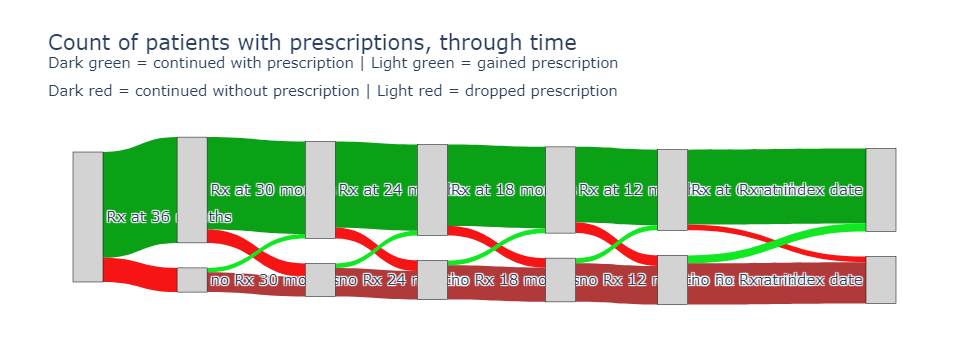

In [11]:
fig = plotly.graph_objects.Figure(data = [plotly.graph_objects.Sankey(
    node = dict(
      pad = 50,
      thickness = 30,
      line = dict(color = "black", width = 0.5),
      label = myDict['node_label'],
      color = "lightgrey",
      x = [0.01, 0.14, 0.14, 0.3, 0.3, 0.44, 0.44, 0.6, 0.6, 0.74, 0.74, 1.0, 1.0],
      y = [0.65, 0.50, 1.00, 0.5, 1.0, 0.50, 1.00, 0.5, 1.0, 0.50, 1.00, 0.5, 1.0],
    ),
    link = dict(
      source = myDict['link_source'],
      target = myDict['link_target'],
      value = myDict['link_value'],
      color = myDict['link_colour'],
  ))])


fig.update_layout(
    title_text = "Count of patients with prescriptions, through time<br>" +
                 "<sup>Dark green = continued with prescription | Light green = gained prescription</sup><br>" +
                 "<sup>Dark red = continued without prescription | Light red = dropped prescription</sup>"
    ,font_size = 15
)
fig.show()